## Perform EDA using the Sneakers dataset (link provided below)

In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('./Sneakers.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [8]:
from datetime import datetime

In [15]:
data['created_at']=pd.to_datetime(data['created_at'])

In [16]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [18]:
data.shape

(5000, 7)

### Q1. Most preferred payment methods

In [19]:
data['payment_method'].unique()

array(['cash', 'credit_card', 'debit'], dtype=object)

In [20]:
data_cash=data[data['payment_method']=='cash']
data_cash.count()

order_id          1594
shop_id           1594
user_id           1594
order_amount      1594
total_items       1594
payment_method    1594
created_at        1594
dtype: int64

In [21]:
data_credit=data[data['payment_method']=='credit_card']
data_credit.count()

order_id          1735
shop_id           1735
user_id           1735
order_amount      1735
total_items       1735
payment_method    1735
created_at        1735
dtype: int64

In [22]:
data_debit=data[data['payment_method']=='debit']
data_debit.count()

order_id          1671
shop_id           1671
user_id           1671
order_amount      1671
total_items       1671
payment_method    1671
created_at        1671
dtype: int64

In [23]:
1594+1735+1671

5000

# FROM ABOVE OBSERVATION WE CAN CONCLUDE THAT ---CREDIT CARD-- IS THE MOST PREFFERED PAYMENT METHOD

### Q2. Shop number with maximum revenue

In [24]:
data_shop =data.groupby('shop_id')[['order_amount']].sum().reset_index().sort_values('order_amount',ascending = False)
print('Shop id with Max Revenue')
data_shop

Shop id with Max Revenue


,shop_id,order_amount
41,42,11990176
77,78,2263800
88,89,23128
80,81,22656
5,6,22627
...,...,...
1,2,9588
99,100,8547
55,56,8073
31,32,7979


In [25]:
data['shop_id'].nunique()

100

# SHOP_ID 42 HAS THE MAX REVENUE

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

### Q3. Top 10 sellers with figures on number of items sold

In [27]:
data_sellers =data.groupby('shop_id')[['total_items']].sum().reset_index().sort_values('total_items',ascending = False)
print('Top 10 Sellers with most items sold')
data_sellers.head(10)

Top 10 Sellers with most items sold


,shop_id,total_items
41,42,34063
12,13,136
83,84,132
70,71,130
52,53,130
80,81,128
40,41,127
23,24,126
18,19,126
13,14,121


### Q4. Total order amount in March, 2017

In [28]:
data_amount =data['order_amount'].sum()
print('Total order amount in March, 2017')
data_amount

Total order amount in March, 2017


15725640

### Q5. user_id with maximum frequency and user_id with minimum frequency

In [29]:
data['user_id'].mode()

0    718
Name: user_id, dtype: int64

In [30]:
data[data['user_id']==718].count()

order_id          28
shop_id           28
user_id           28
order_amount      28
total_items       28
payment_method    28
created_at        28
dtype: int64

In [31]:
from collections import Counter
 
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
   
List = data['user_id']
print(most_frequent(List))

718


# 718 IS THE MOST FREQUENT USER_ID

In [32]:
from collections import Counter

In [33]:
# initialize list 
user_id = data['user_id']
  
# Extract least frequency element
# using Counter
res = Counter(user_id)
tar_ele = res.most_common()[-1][0]
tar_ele

750

# 750 IS THE LEAST FREQUENT USER_ID

### Q6. Maximum number of items bought by a user_id

In [34]:
data_items =data.groupby('user_id')[['total_items']].sum().reset_index().sort_values('total_items',ascending = False)
print('Maximum number of items bought by a user_id')
data_items.head()

Maximum number of items bought by a user_id


,user_id,total_items
0,607,34000
19,718,58
88,787,57
46,745,56
148,847,54


# 34000 items bought by user_id 607, it is the highest

### Q7. Total order amount by cash, debit card and credit card

In [35]:
data_total =data.groupby('payment_method')[['order_amount']].sum().reset_index()
print('Amount by methodwise')
data_total

Amount by methodwise


,payment_method,order_amount
0,cash,1164183
1,credit_card,12945867
2,debit,1615590


In [36]:
data_total1 =data[['order_amount']].sum().reset_index()
print('Total Amount')
data_total1

Total Amount


,index,0
0,order_amount,15725640


# 1,57,25,640 it is the total amount by cash, debit card and credit card

### Q8. Total items sold in March, 2017

In [37]:
data_total_items =data['total_items'].sum()
print('Total items sold in March, 2017')
data_total_items

Total items sold in March, 2017


43936

### Q9. Trend of the order amount throughout

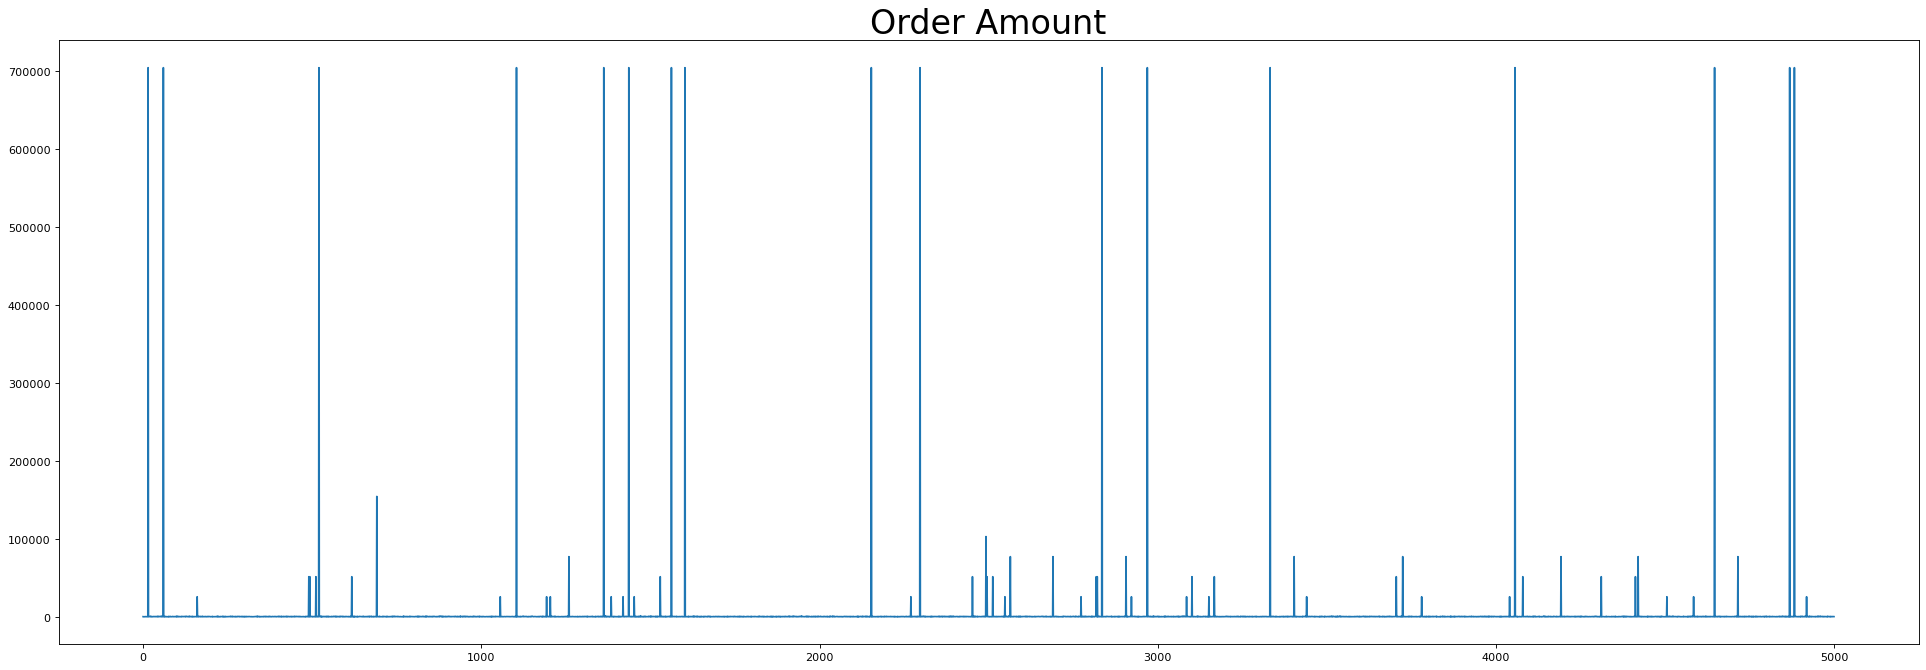

In [38]:
plt.figure(num=None, figsize=(30,10),dpi = 80,facecolor='w',edgecolor='k')
plt.title('Order Amount',fontsize=30)
plt.plot(data.order_amount)

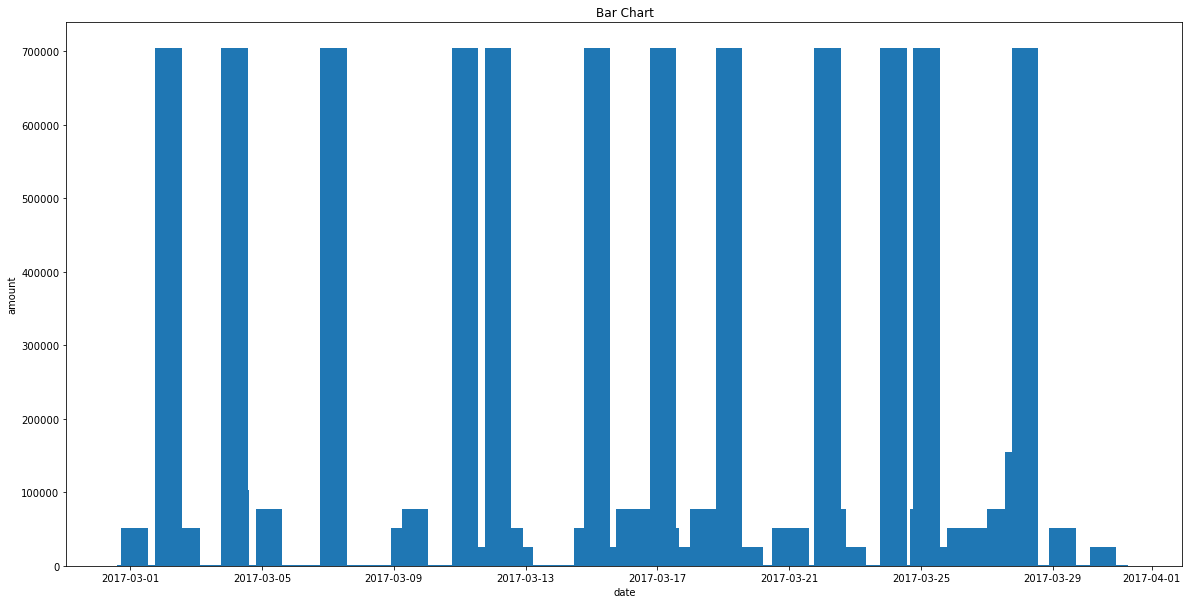

In [39]:
plt.figure(figsize=(20,10))
 
# Bar chart with day against tip
plt.bar(data['created_at'], data['order_amount'])

 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('date')
plt.ylabel('amount')
 
# Adding the legends
plt.show()

### Q10. What can be commented after understanding the sneakers sales for the month of March,2017

In [40]:
data_2 =data.groupby('shop_id')[['order_amount']].sum().reset_index().sort_values('order_amount',ascending = False)
print('Shop id with Max Revenue')
data_2.head()

Shop id with Max Revenue


,shop_id,order_amount
41,42,11990176
77,78,2263800
88,89,23128
80,81,22656
5,6,22627


# SHOP ID 42 AND SHOP ID 78 ARE TOP 2 SHOPS ON THE BASIS OF REVENUE

# COMPANY SHOULD PUSH THEIR PRODUCTS TO THESE SHOPS

In [41]:
data_3 =data.groupby('shop_id')[['total_items']].sum().reset_index().sort_values('total_items',ascending = False)
print('Top 10 Sellers with most items sold')
data_3.head(10)

Top 10 Sellers with most items sold


,shop_id,total_items
41,42,34063
12,13,136
83,84,132
70,71,130
52,53,130
80,81,128
40,41,127
23,24,126
18,19,126
13,14,121


# SHOP ID 42 IS THE NO.1 SHOP ON THE BASIS OF REVENUE AND THE ITEMS SOLD

In [42]:
data_4 =data.groupby('user_id')[['total_items']].sum().reset_index().sort_values('total_items',ascending = False)
print('Maximum number of items bought by a user_id')
data_4.head()

Maximum number of items bought by a user_id


,user_id,total_items
0,607,34000
19,718,58
88,787,57
46,745,56
148,847,54


In [43]:
data_5 =data.groupby('user_id')[['order_amount']].sum().reset_index().sort_values('order_amount',ascending = False)
print('Maximum order amount by a user_id')
data_5.head()

Maximum order amount by a user_id


,user_id,order_amount
0,607,11968000
179,878,156936
135,834,108342
88,787,85707
270,969,84269


# USER ID 607 IS THE NO.1 USER ON THE BASIS OF ORDER AMOUNT AND NUMBER OF ITEMS BOUGHT

# USER ID 607 SHOULD TARGETED BY COMPANY/SHOPS

# ---

# ---------CASE STUDY-------------

In [45]:
data_click = pd.read_csv('./Ad click data.csv')

In [46]:
data_click.head()

,VisitorID,TimeSpent,Age,AvgIncome,InternetUsage,AdTopic,CountryName,CityCode,Male,TimePeriod,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [47]:
data_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VisitorID      6657 non-null   int64  
 1   TimeSpent      6657 non-null   float64
 2   Age            6657 non-null   int64  
 3   AvgIncome      6657 non-null   float64
 4   InternetUsage  6657 non-null   float64
 5   AdTopic        6657 non-null   object 
 6   CountryName    6657 non-null   object 
 7   CityCode       6657 non-null   object 
 8   Male           6657 non-null   object 
 9   TimePeriod     6657 non-null   object 
 10  Weekday        6657 non-null   object 
 11  Month          6657 non-null   object 
 12  Year           6657 non-null   int64  
 13  Clicked        6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [48]:
df_dummy = pd.get_dummies(data_click,columns=['AdTopic','CountryName','CityCode','Male','TimePeriod','Weekday','Month'],drop_first=True)

In [49]:
df_dummy.head()

,VisitorID,TimeSpent,Age,AvgIncome,InternetUsage,Year,Clicked,AdTopic_product_10,AdTopic_product_11,AdTopic_product_12,...,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May
0,5183153,87.97,43,55901.12,185.46,2020,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,4023265,51.63,50,39132.00,176.73,2020,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4708083,82.37,38,57032.36,210.60,2020,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,9771815,62.06,45,48868.00,190.05,2020,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6451317,77.66,31,61608.23,204.86,2020,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [50]:
df_dummy.shape

(6657, 298)

In [51]:
y = df_dummy[['Clicked']]
x = df_dummy.drop(columns=['Clicked'])

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scal = sc.fit_transform(x)

In [53]:
x_scal = pd.DataFrame(x_scal,columns=x.columns)
x_scal.head()

,VisitorID,TimeSpent,Age,AvgIncome,InternetUsage,Year,AdTopic_product_10,AdTopic_product_11,AdTopic_product_12,AdTopic_product_13,...,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May
0,-0.138270,1.361862,0.522180,-0.002240,0.011863,0.0,-0.190024,5.460718,-0.187892,-0.1963,...,-0.415235,2.487767,-0.404233,-0.4002,-0.406494,-0.417470,2.481545,-0.405741,-0.402975,-0.407998
1,-0.585053,-0.981368,1.158854,-1.281412,-0.190283,0.0,-0.190024,-0.183126,-0.187892,-0.1963,...,-0.415235,-0.401967,-0.404233,-0.4002,-0.406494,-0.417470,-0.402975,2.464628,-0.402975,-0.407998
2,-0.321265,1.000770,0.067412,0.084052,0.593987,0.0,-0.190024,-0.183126,-0.187892,-0.1963,...,-0.415235,-0.401967,2.473820,-0.4002,-0.406494,2.395382,-0.402975,-0.405741,-0.402975,-0.407998
3,1.629259,-0.308834,0.704087,-0.538736,0.118146,0.0,-0.190024,-0.183126,-0.187892,-0.1963,...,-0.415235,2.487767,-0.404233,-0.4002,-0.406494,-0.417470,-0.402975,-0.405741,-0.402975,-0.407998
4,0.350220,0.697066,-0.569262,0.433106,0.461076,0.0,-0.190024,5.460718,-0.187892,-0.1963,...,-0.415235,2.487767,-0.404233,-0.4002,-0.406494,2.395382,-0.402975,-0.405741,-0.402975,-0.407998


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_scal,y,test_size=0.2,random_state=42)

In [56]:
len(x_train),len(x_test),len(y_train),len(y_test)

(5325, 1332, 5325, 1332)

# Building Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model = log_reg.fit(x_train,y_train)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
y_test.head()

,Clicked
3332,1
217,0
4715,0
2939,1
1544,1


In [59]:
y_test['Prediction_LR'] = model.predict(x_test)

In [60]:
y_test.head()

,Clicked,Prediction_LR
3332,1,1
217,0,0
4715,0,0
2939,1,1
1544,1,1


In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [62]:
print(confusion_matrix(y_test['Clicked'],y_test['Prediction_LR']))

[[679  37]
 [ 63 553]]


In [63]:
print(accuracy_score(y_test['Clicked'],y_test['Prediction_LR']))

0.924924924924925


The Logistic Regression model is able to predict the data with 92.5% accuracy.

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)

In [65]:
y_test['Prediction_DT'] = model.predict(x_test)

In [66]:
y_test.head()

,Clicked,Prediction_LR,Prediction_DT
3332,1,1,1
217,0,0,0
4715,0,0,0
2939,1,1,1
1544,1,1,0


In [67]:
print(confusion_matrix(y_test['Clicked'],y_test['Prediction_DT']))

[[671  45]
 [ 76 540]]


In [68]:
print(accuracy_score(y_test['Clicked'],y_test['Prediction_DT']))

0.9091591591591591


The Decision tree algorithm is not performing better than logistic regression and it is giving an accuracy of 91.14%